In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtpl

varNames = ["a","A","B","D"]

data_hash_simple = {}

do_ang = False

for name in varNames: 
    filename = f"build/{name}_simple_pos.txt"
    
    data = np.loadtxt(filename)
    #print(data.shape)
    z_vals = int(np.sqrt(data.shape[0]))
    x_max = z_vals//2 

    data = np.array(np.split(data,z_vals,axis=0))
    x, y, z = np.indices(data.shape)
    
    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-x_max)/x_max
    if do_ang:
        x = np.arccos(x)
        y = np.arccos(y)
    
    data_hash_simple[name] = [data,x,y,z]

    #print(data.shape)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(6,6))
    scat = ax.scatter(x.flatten(),y.flatten(),z.flatten(),c = data.flatten(),s=15)
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    ax.view_init(azim=120)
    fig.colorbar(scat,label="Ang Corr Factor",shrink=0.5,fraction=0.035)
    plt.show()
    fig.savefig(f"plots/{name}_3D_image.png")
    
    if name in ["A","B"]:
        fig, axs = plt.subplots(1,2,figsize=(6*2,6))
        im2d = axs[0].imshow(data[:,:,0].T,extent=(-1,1,-1,1),origin="lower")
        axs[0].set_xlabel("$\\cos(\\theta_e)$")
        axs[0].set_ylabel("$\\cos(\\theta_\\nu)$")
        fig.colorbar(im2d,label="Ang Corr Factor",shrink=1,fraction=0.1)
        axs[1].plot(x[:,x_max,0],data[:,x_max,0],label="$\\cos \\theta_\\nu = 0$")
        axs[1].set_xlabel("$\\cos(\\theta)$")
        axs[1].plot(y[x_max,:,0],data[x_max,:,0],label="$\\cos \\theta_e = 0$")
        axs[1].legend()
        plt.show()
    elif name == "a":
        fig, axs = plt.subplots(1,2,figsize=(6*2,6))
        im2d = axs[0].imshow(data[:,:,0].T,extent=(-1,1,-1,1),origin="lower")
        axs[0].set_xlabel("$\\cos(\\theta_e)$")
        axs[0].set_ylabel("$\\cos(\\theta_\\nu)$")
        fig.colorbar(im2d,label="Ang Corr Factor",shrink=1,fraction=0.1)
        z_range = np.linspace(-1,1,2001)
        axs[1].plot(z_range,1+np.sqrt(1-z_range**2),label="Theory $\\cos \\theta_\\nu = 0$")
        axs[1].plot(x[:,x_max,0],data[:,x_max,0],"+",markersize=8,label="$\\cos \\theta_\\nu = 0$")
        axs[1].set_xlabel("$\\cos(\\theta_e)$")
        axs[1].plot(x[:,-1,0],data[:,-1,0],label="$\\cos \\theta_\\nu = 1$")
        axs[1].legend()
        plt.show()
    else:
        fig, axs = plt.subplots(1,2,figsize=(6*2,6))
        im2d = axs[0].imshow(data[:,x_max,:].T,extent=(-1,1,-1,1),origin="lower")
        axs[0].set_xlabel("$\\cos(\\theta_e)$")
        axs[0].set_ylabel("$\\phi$ (rad)")
        fig.colorbar(im2d,label="Ang Corr Factor",shrink=1,fraction=0.1)
        phi_range = np.linspace(0,2*np.pi,data.shape[2]*10)
        axs[1].plot(z[x_max,x_max,:],data[x_max,x_max,0:],"+",markersize=8,label="Data")
        axs[1].plot(phi_range,1+np.sin(phi_range),label="Theory")
        axs[1].set_xlabel("$\\phi$ (rad)")
        axs[1].legend()
        plt.show()
    fig.savefig(f"plots/crosssections_{name}.png")
    
    print(data.max())
    print(data.min())

for name in varNames:         
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(6,6))
    #ax.set_title(f"Maxima and minima of {name}")
    data, x, y ,z = data_hash_simple[name]
    max_mask = np.where(data==data.max())
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    ax.set_xlim3d([-1,1])
    ax.set_ylim3d([-1,1])
    ax.set_zlim3d([0,2*np.pi])
    ax.view_init(elev=20,azim=120)
    if name == "D":
        print("Position of maximum:",x[max_mask],y[max_mask],z[max_mask])
    ax.scatter(x[max_mask].flatten(),y[max_mask].flatten(),z[max_mask].flatten(),s=20,c="blue")
    min_mask = np.where(data==data.min())
    if name == "D":
        print("Position of minimum:",x[min_mask],y[min_mask],z[min_mask])
    ax.scatter(x[min_mask].flatten(),y[min_mask].flatten(),z[min_mask].flatten(),s=20,c="orange")   
    if name == "D":
        ax.plot([x[min_mask][0],x[min_mask][0]],[y[min_mask][0],y[min_mask][0]],[z[min_mask][0],-0.1],color="orange")
    fig.savefig(f"plots/{name}_max_min.png")
    plt.show()


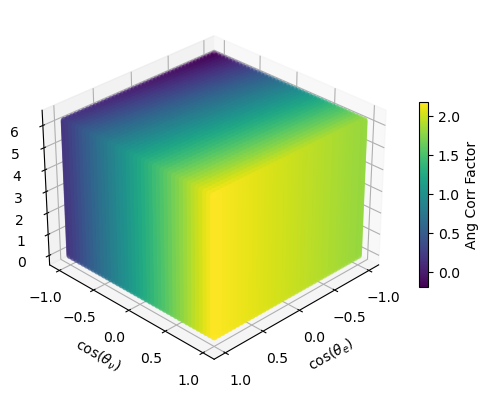

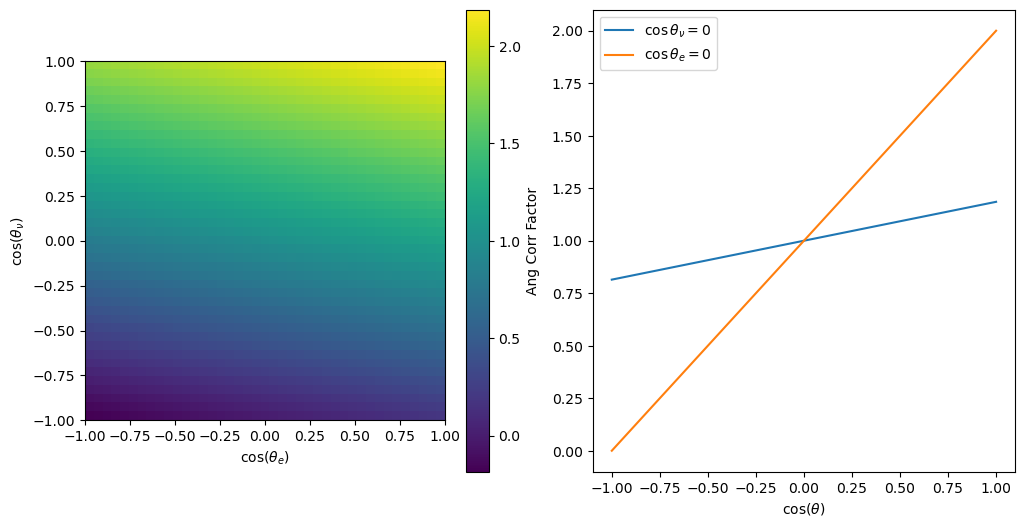

2.18526
-0.18526


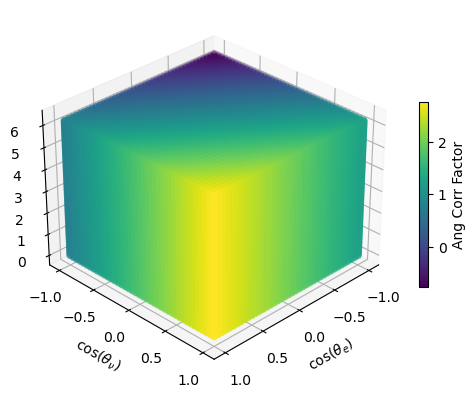

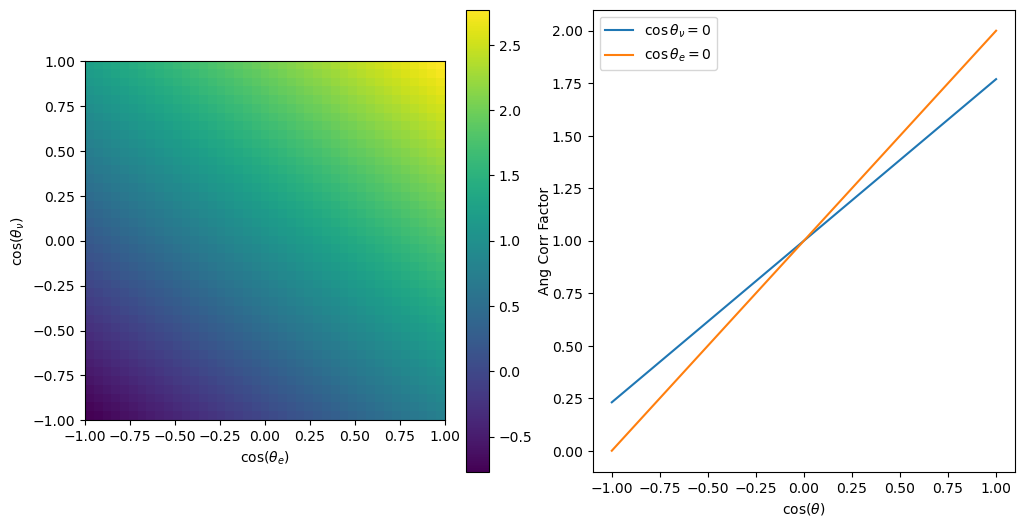

2.76942
-0.76942


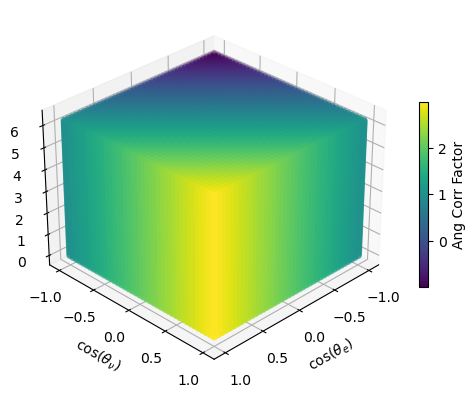

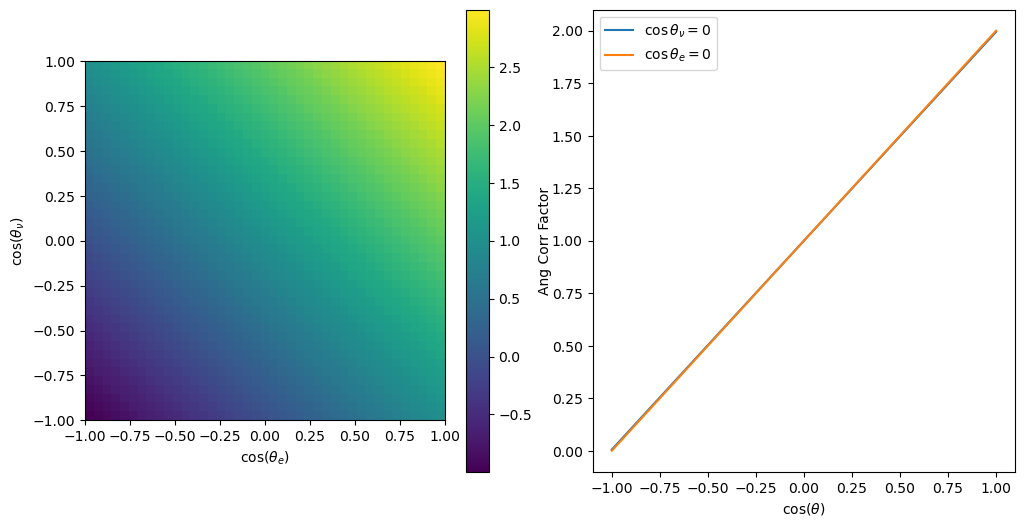

2.99476
-0.99476


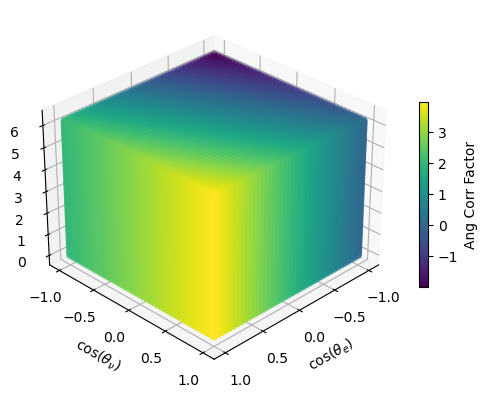

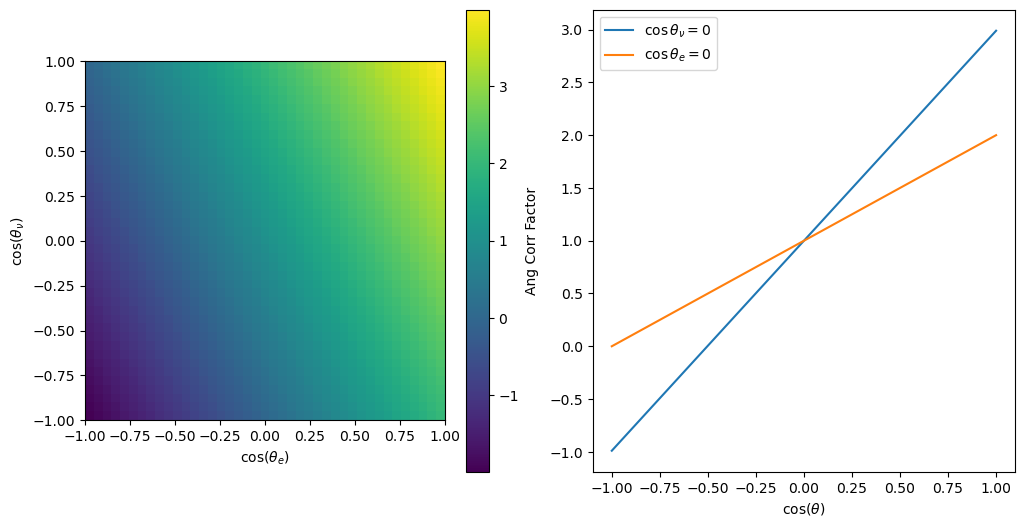

3.98953
-1.98953


KeyboardInterrupt: 

In [2]:
fileNames = ["build/posA_posB_lowE.txt","build/posA_posB_medE.txt","build/posA_posB_hiE.txt",
             "build/posA_posB_hiA.txt","build/posA_posB_vhiA.txt",
             "build/posA_negB_lowE.txt","build/posA_negB_hiE.txt"]

do_ang = False

for filename in fileNames:    
    data = np.loadtxt(filename)
    #print(data.shape)
    z_vals = int(np.sqrt(data.shape[0]))
    x_max = z_vals//2 

    data = np.array(np.split(data,z_vals,axis=0))
    x, y, z = np.indices(data.shape)

    
    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-x_max)/x_max
    
    #print(data.shape)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.view_init(elev=30,azim=45)
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    scat = ax.scatter(x.flatten(),y.flatten(),z.flatten(),c = data.flatten(),s=20)
    fig.colorbar(scat,label="Ang Corr Factor",shrink=0.5,fraction=0.1)
    plt.show()
    fig, axs = plt.subplots(1,2,figsize=(6*2,6))
    im2d = axs[0].imshow(data[:,:,0].T,extent=(-1,1,-1,1),origin="lower")
    axs[0].set_xlabel("$\\cos(\\theta_e)$")
    axs[0].set_ylabel("$\\cos(\\theta_\\nu)$")
    fig.colorbar(im2d,label="Ang Corr Factor",shrink=1,fraction=0.1)
    axs[1].plot(x[:,x_max,0],data[:,x_max,0],label="$\\cos \\theta_\\nu = 0$")
    axs[1].set_xlabel("$\\cos(\\theta)$")
    axs[1].plot(y[x_max,:,0],data[x_max,:,0],label="$\\cos \\theta_e = 0$")
    axs[1].legend()
    fig.savefig(f"plots/{filename[6:-4]}.png")
    plt.show()
    
    print(data.max())
    print(data.min())
    

In [ ]:
fileNames = ["build/posa_posB_lowE.txt","build/posa_posB_medE.txt","build/posa_posB_hiE.txt",
             "build/posa_posB_hia.txt","build/posa_posB_vhia.txt",
             "build/posa_negB_lowE.txt","build/posa_negB_hiE.txt"]

max_a_mag = []

for filename in fileNames:    
    data = np.loadtxt(filename)
    #print(data.shape)
    z_vals = int(np.sqrt(data.shape[0]))
    x_max = z_vals//2 

    data = np.array(np.split(data,z_vals,axis=0))
    x, y, z = np.indices(data.shape)
    
    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-x_max)/x_max
    
    print(data.shape)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(6,6))
    ax.view_init(elev=30,azim=45)
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    scat = ax.scatter(x.flatten(),y.flatten(),z.flatten(),c = data.flatten(),s=20)
    fig.colorbar(scat,label="Ang Corr Factor",shrink=0.5,fraction=0.1)
    plt.show()
    fig.savefig(f"plots/{filename[6:-4]}_3D.png")
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(6,7))
    #if "posB" in filename:
    #    ax.set_title(f"Maxima and minima of (a, B) {filename[16:-4]}")
    #else:
    #    ax.set_title(f"Maxima and minima of (a, -B) {filename[16:-4]}")
    max_mask = np.where(data==data.max())
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    ax.set_xlim3d([-1,1])
    ax.set_ylim3d([-1,1])
    ax.set_zlim3d([0,2*np.pi])
    ax.view_init(elev=20,azim=120)
    ax.scatter(x[max_mask].flatten(),y[max_mask].flatten(),z[max_mask].flatten(),s=20,c="blue")
    min_mask = np.where(data==data.min())
    ax.scatter(x[min_mask].flatten(),y[min_mask].flatten(),z[min_mask].flatten(),s=20,c="orange")   
    fig.savefig(f"plots/{filename[6:-4]}_max_min.png")
    plt.show()   
    print(data.max())
    if "posB" in filename:
        max_a_mag.append(data.max()-2)
    print(data.min())


In [ ]:
fileNames = ["build/posD_posB_lowE.txt","build/posD_posB_medE.txt","build/posD_posB_hiE.txt",
             "build/posD_posB_hiD.txt","build/posD_posB_vhiD.txt",
             "build/posD_negB_lowE.txt","build/posD_negB_hiE.txt"]

max_val = np.empty((7,5))

def val_range(x,axis=None):
    return x.max(axis=axis)-x.min(axis=axis)

for i, filename in enumerate(fileNames):    
    data = np.loadtxt(filename)
    #print(data.shape)

    data = np.array(np.split(data,81,axis=0))
    x, y, z = np.indices(data.shape)
    x_max = 40
    y_max = data.shape[1]//2
    
    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-y_max)/y_max
    
    print(filename)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.view_init(elev=30,azim=45)
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    y_rate = (100 if y_max == 1000 else 4)
    scat = ax.scatter(x[::4,::y_rate,:].flatten(),y[::4,::y_rate,:].flatten(),z[::4,::y_rate,:].flatten(),
                        c = data[::4,::y_rate,:].flatten(),s=20)

    fig.colorbar(scat,label="Ang Corr Factor",shrink=1,fraction=0.1)
    plt.show()
    if "medE" in filename:
        fig.savefig(f"plots/{filename[6:-4]}_3D.png")
    elif "hiD" in filename:
        fig.savefig(f"plots/{filename[6:-4]}_3D.png")
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(6,7))
    #if "posB" in filename:
    #    ax.set_title(f"Maxima and minima of (D, B) {filename[16:-4]}")
    #else:
    #    ax.set_title(f"Maxima and minima of (D, -B) {filename[16:-4]}")
    max_mask = np.where(data==data.max())
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    ax.set_xlim3d([-1,1])
    ax.set_ylim3d([-1,1])
    ax.set_zlim3d([0,2*np.pi])
    ax.view_init(elev=20,azim=120)
    print("Position of maximum:",x[max_mask],y[max_mask],z[max_mask])
    ax.scatter(x[max_mask].flatten(),y[max_mask].flatten(),z[max_mask].flatten(),s=20,c="blue")
    ax.plot([x[max_mask][0],x[max_mask][0]],[y[max_mask][0],y[max_mask][0]],[z[max_mask][0],-0.1],color="blue")
    min_mask = np.where(data==data.min())
    print("Position of minimum:",x[min_mask],y[min_mask],z[min_mask])
    ax.scatter(x[min_mask].flatten(),y[min_mask].flatten(),z[min_mask].flatten(),s=20,c="orange")   
    ax.plot([x[min_mask][0],x[min_mask][0]],[y[min_mask][0],y[min_mask][0]],[z[min_mask][0],-0.1],color="orange")
    fig.savefig(f"plots/{filename[6:-4]}_max_min.png")
    plt.show()
    if "posB" in filename:
        max_val[:,i] = [x[max_mask].mean(),val_range(x[max_mask]),
                        y[max_mask].mean(),val_range(y[max_mask]),
                        z[max_mask].mean(),val_range(z[max_mask]),
                        data[max_mask].mean()]
    print(data.max())
    print(data.min())
    line_y_max = data[max_mask[0][0],:,max_mask[2][0]]
    plt.plot(np.linspace(-1,1,2*y_max+1),line_y_max)
    line_x_max = data[:,max_mask[1][0],max_mask[2][0]]
    plt.plot(np.linspace(-1,1,2*x_max+1),line_x_max)
    plt.show()
    

In [ ]:
D_exp = np.array(max_a_mag)
D_theory = np.linspace(D_exp.min(),D_exp.max(),100)

cos_theory = 1/np.sqrt(1+D_theory**2)
angCorrFactor_theory = cos_theory+D_theory*np.sqrt(1-cos_theory**2) + 1

fig, axs = plt.subplots(1,2,figsize = (6*2,6))
for ax in axs:
    ax.set_xlabel("D'",fontsize = 14)
axs[0].set_ylabel("$\\cos \\theta_{\\nu,max}$",fontsize = 14)
axs[1].set_ylabel("Ang Corr Factor",fontsize = 14)
axs[0].errorbar(D_exp,max_val[2,:],linewidth=0,elinewidth=1,marker = 'x',markersize = 8)
axs[0].plot(D_theory,cos_theory)
axs[1].plot(D_exp,max_val[6,:],marker = 'x',linewidth=0,markersize = 8)
axs[1].plot(D_theory,angCorrFactor_theory)
fig.savefig("plots/BD_max_behaviour.png")
plt.show()

In [ ]:
label_size = ["xs","s","eq","l","xl"]
label_sign = ["pos","neg"]
A_vals = [0.1,0.5,1,2,5]
fileNames = []

for size in label_size:
    for sign in label_sign:
        fileNames.append(f"build/posa_{size}{sign}A.txt")

for i, filename in enumerate(fileNames):    
    data = np.loadtxt(filename)
    #print(data.shape)
    z_vals = int(np.sqrt(data.shape[0]))
    x_max = z_vals//2 

    data = np.array(np.split(data,z_vals,axis=0))
    x, y, z = np.indices(data.shape)
    
    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-x_max)/x_max
    
    print(filename)
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.view_init(elev=30,azim=45)
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    scat = ax.scatter(x.flatten(),y.flatten(),z.flatten(),c = data.flatten(),s=20)
    fig.colorbar(scat,label="Ang Corr Factor",shrink=0.5,fraction=0.1)
    plt.show()
    fig.savefig(f"plots/{filename[6:-4]}_3D.png")
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(6,6))
    #if "posB" in filename:
    #    ax.set_title(f"Maxima and minima of (a, A) A = {A_vals[i//2]}")
    #else:
    #    ax.set_title(f"Maxima and minima of (a, A) A = {A_vals[i//2]}")
    max_mask = np.where(data==data.max())
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    ax.set_xlim3d([-1,1])
    ax.set_ylim3d([-1,1])
    ax.set_zlim3d([0,2*np.pi])
    ax.view_init(elev=20,azim=120)
    ax.scatter(x[max_mask].flatten(),y[max_mask].flatten(),z[max_mask].flatten(),s=20,c="blue")
    min_mask = np.where(data==data.min())
    ax.scatter(x[min_mask].flatten(),y[min_mask].flatten(),z[min_mask].flatten(),s=20,c="orange")   
    fig.savefig(f"plots/{filename[6:-4]}_max_min.png")
    plt.show()   
    print(data.max())
    print(data.min())

In [ ]:
label_size = ["xs","s","eq","l","xl"]
label_sign = ["pos","neg"]
A_vals = [0.1,0.5,1,2,5]
fileNames = []

for size in label_size:
    for sign in label_sign:
        fileNames.append(f"build/posD_{size}{sign}A.txt")

max_val = np.empty((7,10))

def val_range(x,axis=None):
    return x.max(axis=axis)-x.min(axis=axis)

for i, filename in enumerate(fileNames):    
    data = np.loadtxt(filename)
    #print(data.shape)

    data = np.array(np.split(data,2001,axis=0))
    x, y, z = np.indices(data.shape)
    y_max = 40
    x_max = data.shape[0]//2

    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-y_max)/y_max
    
    print(filename)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.view_init(elev=30,azim=45)
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    x_rate = (100 if y_max == 1000 else 4)
    scat = ax.scatter(x[::x_rate,::4,:].flatten(),y[::x_rate,::4,:].flatten(),z[::x_rate,::4,:].flatten(),
                        c = data[::x_rate,::4,:].flatten(),s=20)

    fig.colorbar(scat,label="Ang Corr Factor")
    plt.show()
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(6,7))
    #if "posA" in filename:
    #    ax.set_title(f"Maxima and minima of (D, A) A = {A_vals[i//2]}")
    #else:
    #    ax.set_title(f"Maxima and minima of (D, A) A = -{A_vals[i//2]}")
    max_mask = np.where(data==data.max())
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    ax.set_xlim3d([-1,1])
    ax.set_ylim3d([-1,1])
    ax.set_zlim3d([0,2*np.pi])
    ax.view_init(elev=20,azim=120)
    print("Position of maximum:",x[max_mask],y[max_mask],z[max_mask])
    ax.scatter(x[max_mask].flatten(),y[max_mask].flatten(),z[max_mask].flatten(),s=20,c="blue")
    ax.plot([x[max_mask][0],x[max_mask][0]],[y[max_mask][0],y[max_mask][0]],[z[max_mask][0],-0.1],color="blue")
    min_mask = np.where(data==data.min())
    print("Position of minimum:",x[min_mask],y[min_mask],z[min_mask])
    ax.scatter(x[min_mask].flatten(),y[min_mask].flatten(),z[min_mask].flatten(),s=20,c="orange")   
    ax.plot([x[min_mask][0],x[min_mask][0]],[y[min_mask][0],y[min_mask][0]],[z[min_mask][0],-0.1],color="orange")
    fig.savefig(f"plots/{filename[6:-4]}_max_min.png")
    plt.show()
    max_val[:,i] = [x[max_mask].mean(),val_range(x[max_mask]),
                    y[max_mask].mean(),val_range(y[max_mask]),
                    z[max_mask].mean(),val_range(z[max_mask]),
                    data[max_mask].mean()]
    print(data.max())
    print(data.min())
    line_y_max = data[max_mask[0][0],:,max_mask[2][0]]
    plt.plot(np.linspace(-1,1,2*y_max+1),line_y_max)
    line_x_max = data[:,max_mask[1][0],max_mask[2][0]]
    plt.plot(np.linspace(-1,1,2*x_max+1),line_x_max)
    plt.show()

In [ ]:
A_exp = np.array([[A,-A] for A in A_vals]).flatten()*(1-np.sqrt(511**2/100000**2))
print(A_exp)
A_theory = np.linspace(A_exp.min(),A_exp.max(),100)

cos_theory = A_theory/np.sqrt(1+A_theory**2)
angCorrFactor_theory = A_theory*cos_theory+np.sqrt(1-cos_theory**2) + 1

fig, axs = plt.subplots(1,2,figsize = (6*2,6))
for ax in axs:
    ax.set_xlabel("A",fontsize = 14)
axs[0].set_ylabel("$\\cos \\theta_{e,max}$",fontsize = 14)
axs[1].set_ylabel("Ang Corr Factor",fontsize = 14)
axs[0].errorbar(A_exp,max_val[0,:],linewidth=0,elinewidth=1,marker = 'x',markersize = 8)
axs[0].plot(A_theory,cos_theory)
axs[1].plot(A_exp,max_val[6,:],marker = 'x',linewidth=0,markersize = 8)
axs[1].plot(A_theory,angCorrFactor_theory)
plt.show()
fig.savefig("plots/AD_max_behaviour.png")

In [ ]:
label_size = ["xs","s","eq","l","xl"]
label_sign = ["pos","neg"]
D_vals = [0.25,0.5,1,2,4]
fileNames = []

for size in label_size:
    for sign in label_sign:
        fileNames.append(f"build/posa_{size}{sign}D.txt")

max_val = np.empty((7,10))

def val_range(x,axis=None):
    return x.max(axis=axis)-x.min(axis=axis)

for i, filename in enumerate(fileNames):    
    data = np.loadtxt(filename)
    #print(data.shape)

    z_max = int(np.sqrt(data.shape[0]))
    #print(z_max)
    data = np.array(np.split(data,z_max,axis=0))
    x, y, z = np.indices(data.shape)
    x_max = data.shape[0]//2
    y_max = x_max

    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-y_max)/y_max
    
    print(filename)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.view_init(elev=30,azim=45)
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    scat = ax.scatter(x[::10,::10,::4].flatten(),y[::10,::10,::4].flatten(),z[::10,::10,::4].flatten(),
                        c = data[::10,::10,::4].flatten(),s=20)

    fig.colorbar(scat,label="Ang Corr Factor")
    plt.show()
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(6,7))
    #if "posD" in filename:
    #    ax.set_title(f"Maxima and minima of (a, D) D = {D_vals[i//2]}")
    #else:
    #    ax.set_title(f"Maxima and minima of (a, D) D = -{D_vals[i//2]}")
    max_mask = np.where(data==data.max())
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    ax.set_xlim3d([-1,1])
    ax.set_ylim3d([-1,1])
    ax.set_zlim3d([0,2*np.pi])
    ax.view_init(elev=20,azim=120)
    print("Position of maximum:",x[max_mask],y[max_mask],z[max_mask])
    ax.scatter(x[max_mask].flatten(),y[max_mask].flatten(),z[max_mask].flatten(),s=20,c="blue")
    ax.plot([x[max_mask][0],x[max_mask][0]],[y[max_mask][0],y[max_mask][0]],[z[max_mask][0],-0.1],color="blue")
    ax.plot([x[max_mask][0],x[max_mask][0]],[y[max_mask][0],-1.0],[z[max_mask][0],z[max_mask][0]],color="blue")
    min_mask = np.where(data==data.min())
    print("Position of minimum:",x[min_mask],y[min_mask],z[min_mask])
    ax.scatter(x[min_mask].flatten(),y[min_mask].flatten(),z[min_mask].flatten(),s=20,c="orange")   
    ax.plot([x[min_mask][0],x[min_mask][0]],[y[min_mask][0],y[min_mask][0]],[z[min_mask][0],-0.1],color="orange")
    ax.plot([x[min_mask][0],x[min_mask][0]],[y[min_mask][0],-1.0],[z[min_mask][0],z[min_mask][0]],color="orange")
    fig.savefig(f"plots/{filename[6:-4]}_max_min.png")
    plt.show()
    max_val[:,i] = [x[max_mask].mean(),val_range(x[max_mask]),
                    y[max_mask].mean(),val_range(y[max_mask]),
                    z[max_mask].mean(),val_range(z[max_mask]),
                    data[max_mask].mean()]
    print(data.max())
    print(data.min())
    line_z_max = data[max_mask[0][0],max_mask[1][0],:]
    phi_range = np.linspace(0,2*np.pi,data.shape[2]*10)
    fig, ax = plt.subplots()
    ax.set_xlabel("$\\phi$ (rad)")
    ax.set_ylabel("Ang Corr Factor")
    ax.plot(phi_range[::20],line_z_max[::2],'rx',markersize=8, label = "Computation")
    ax.plot(phi_range,1+np.sqrt(D_vals[i//2]**2+1)*np.cos(phi_range-np.arctan(D_vals[i//2]*(-1)**i)), 
             label = "Theory")
    plt.show()

In [ ]:
D_exp = np.array([[D,-D] for D in D_vals]).flatten()*(1-np.sqrt(511**2/100000**2))
D_theory = np.linspace(D_exp.min(),D_exp.max(),2001)

ang_theory = np.arctan(D_theory)
max_val[4,:][max_val[4,:] > np.pi] -= 2*np.pi*np.ones_like(max_val[4,:][max_val[4,:] > np.pi]) 
angCorrFactor_theory = 1+np.sqrt(D_theory**2+1)

print(np.arctan(D_exp),max_val[4,:])


fig, axs = plt.subplots(1,2,figsize = (6*2,6))
for ax in axs:
    ax.set_xlabel("D",fontsize = 14)
axs[0].set_ylabel("$\\phi_{max}$",fontsize = 14)
axs[1].set_ylabel("Ang Corr Factor",fontsize = 14)
axs[0].errorbar(D_exp,max_val[4,:],linewidth=0,elinewidth=2,marker = '+',markersize = 8)
axs[0].plot(D_theory,ang_theory)
axs[1].plot(D_exp,max_val[6,:],marker = '+',linewidth=0,markersize = 8)
axs[1].plot(D_theory,angCorrFactor_theory)
plt.show()
fig.savefig("plots/aD_max_behaviour.png")

In [ ]:
D_exp = np.array([[D,-D] for D in D_vals]).flatten()*(1-np.sqrt(511**2/100000**2))
D_theory = np.linspace(D_exp.min(),D_exp.max(),2001)

angCorrFactor_theory = 1+np.sqrt(D_theory**2+1)

print(D_exp,np.tan(max_val[4,:]))

fig, axs = plt.subplots(1,2,figsize = (6*2,6))
for ax in axs:
    ax.set_xlabel("D",fontsize = 14)
axs[0].set_ylabel("$\\tan \\phi_{max}$",fontsize = 14)
axs[1].set_ylabel("Ang Corr Factor",fontsize = 14)
axs[0].errorbar(D_exp,np.tan(max_val[4,:]),linewidth=0,elinewidth=2,marker = '+',markersize = 8)
axs[0].plot(D_theory,D_theory)
axs[1].plot(D_exp,max_val[6,:],marker = '+',linewidth=0,markersize = 8)
axs[1].plot(D_theory,angCorrFactor_theory)
plt.show()

0.25 520


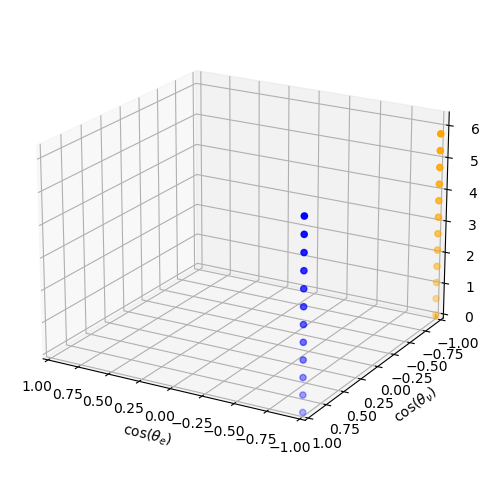

0.25 600


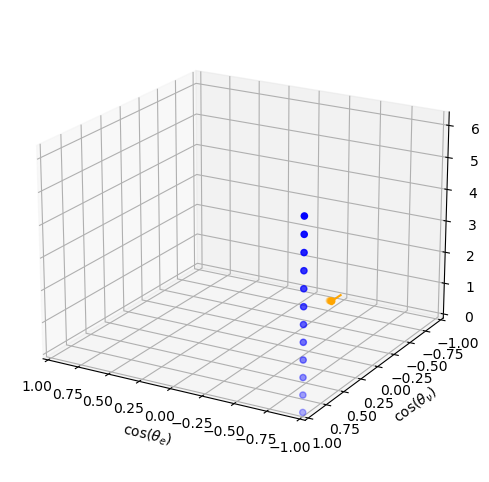

0.25 800


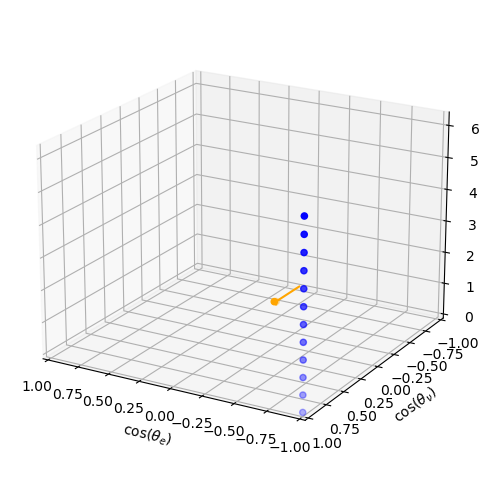

0.25 1500


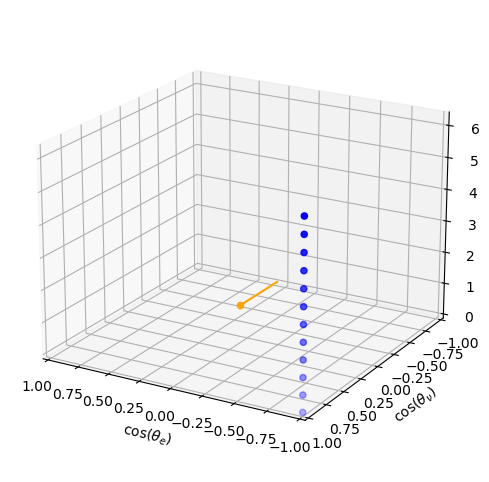

0.25 3000


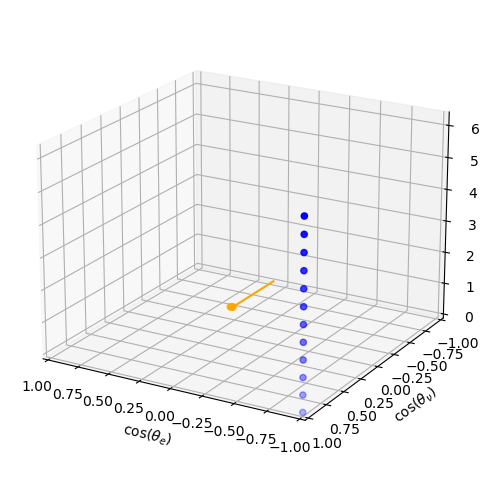

0.5 520


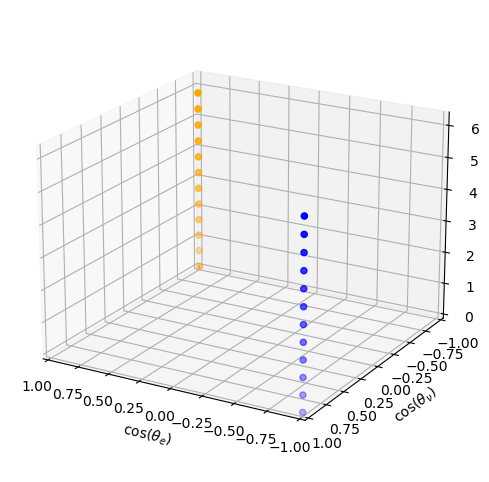

0.5 600


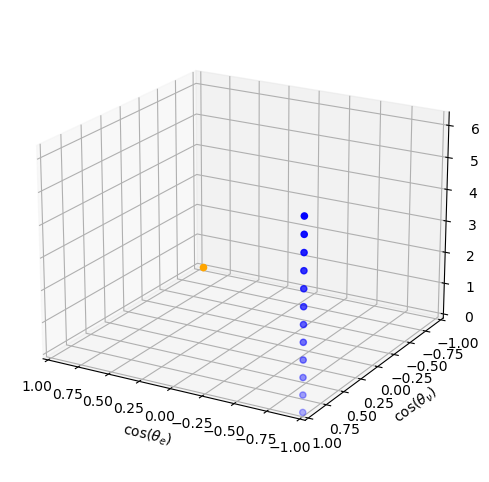

0.5 800


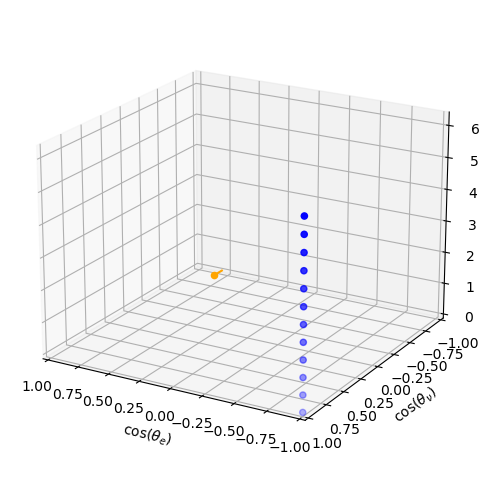

0.5 1500


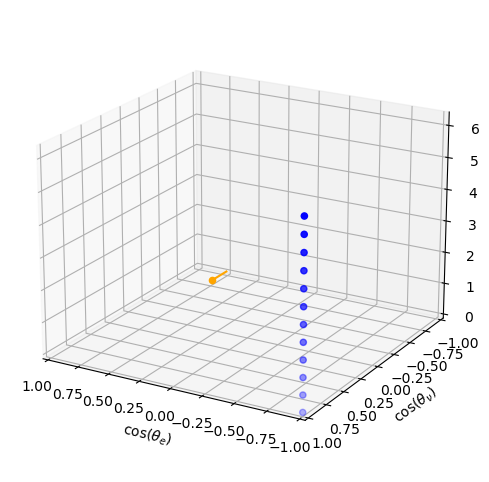

0.5 3000


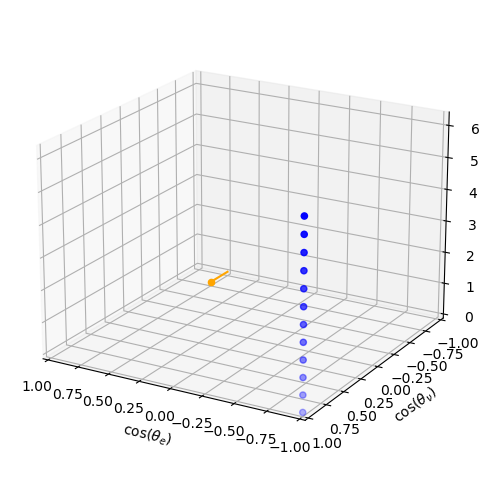

0.6 520


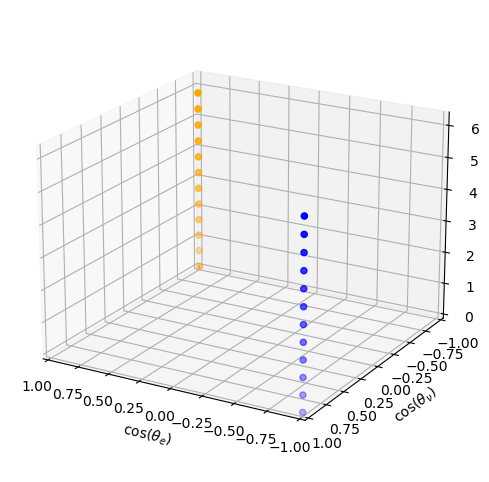

0.6 600


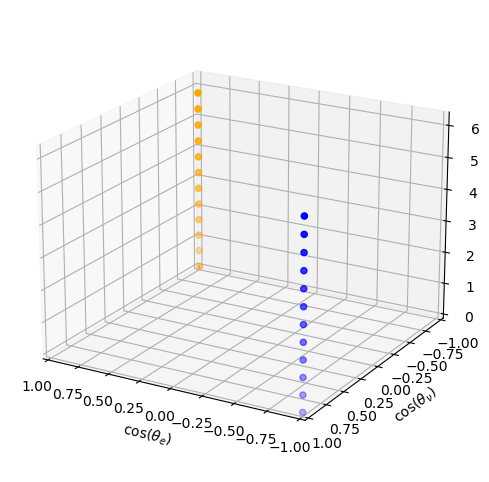

0.6 800


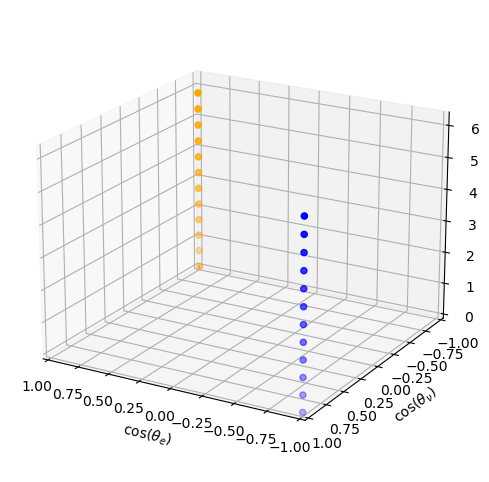

0.6 1500


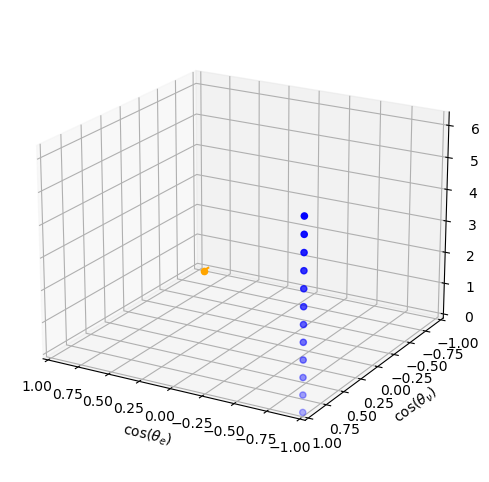

0.6 3000


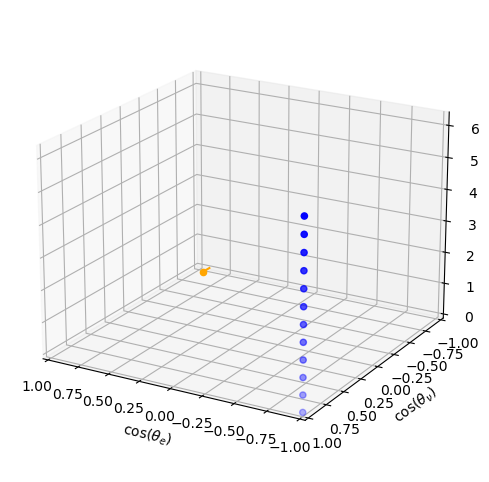

0.8 520


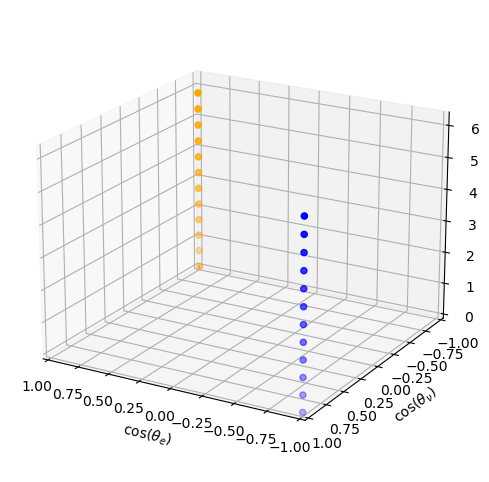

0.8 600


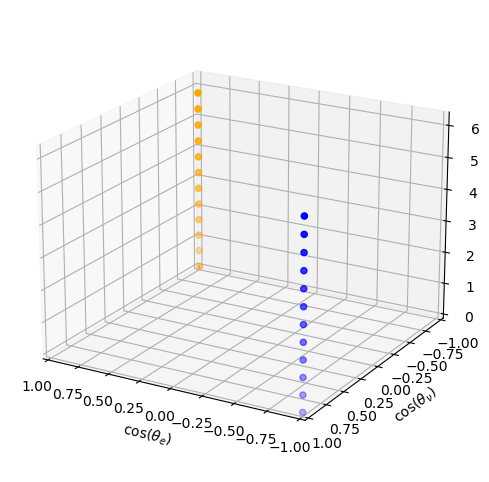

0.8 800


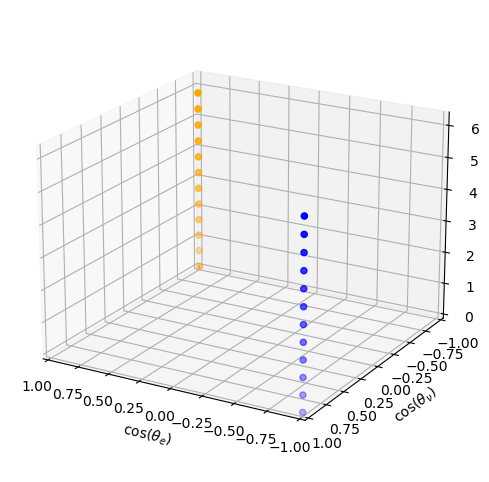

0.8 1500


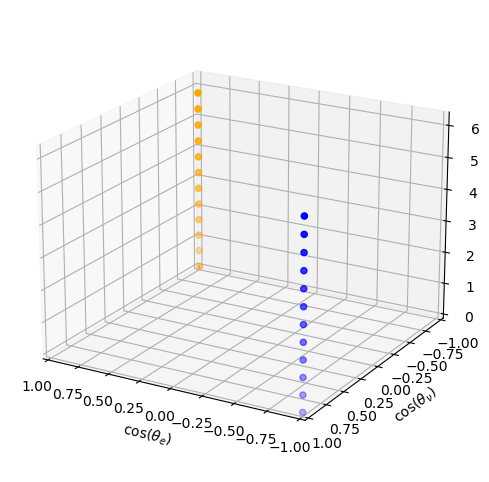

0.8 3000


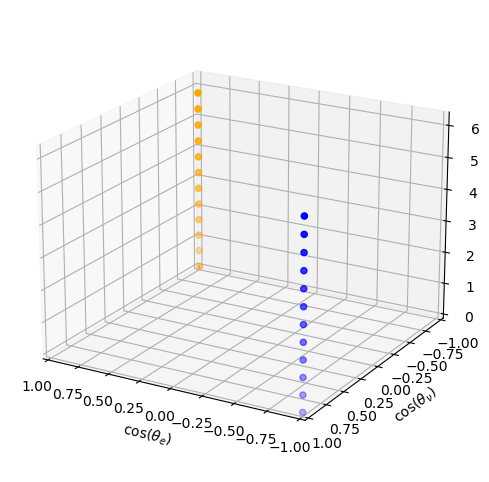

1 520


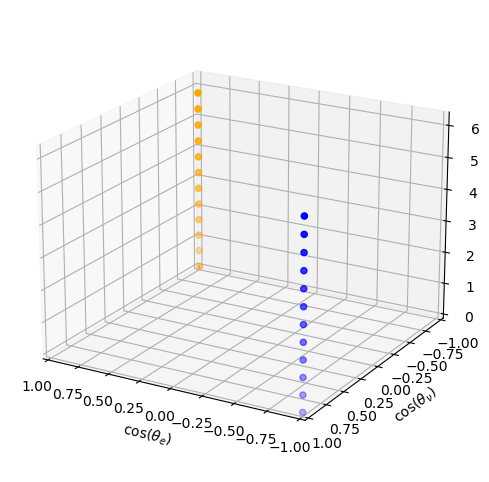

1 600


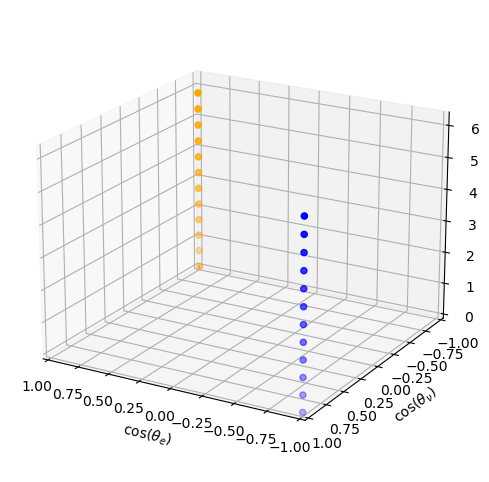

1 800


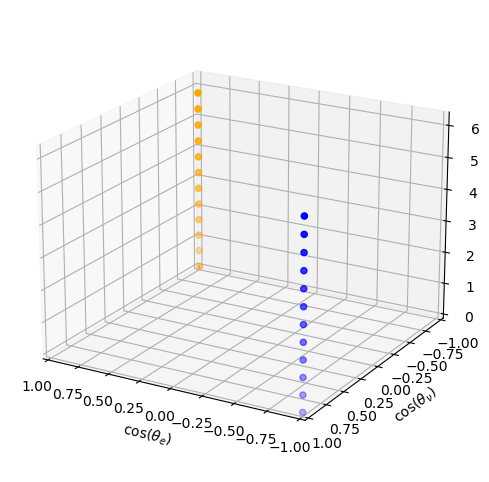

1 1500


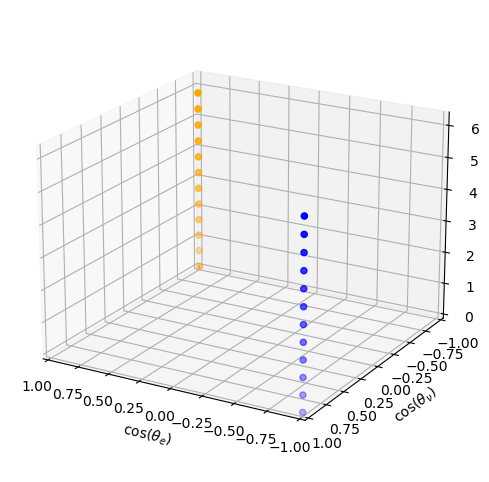

1 3000


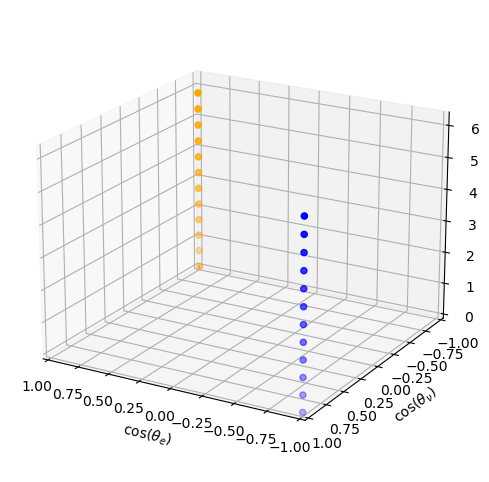

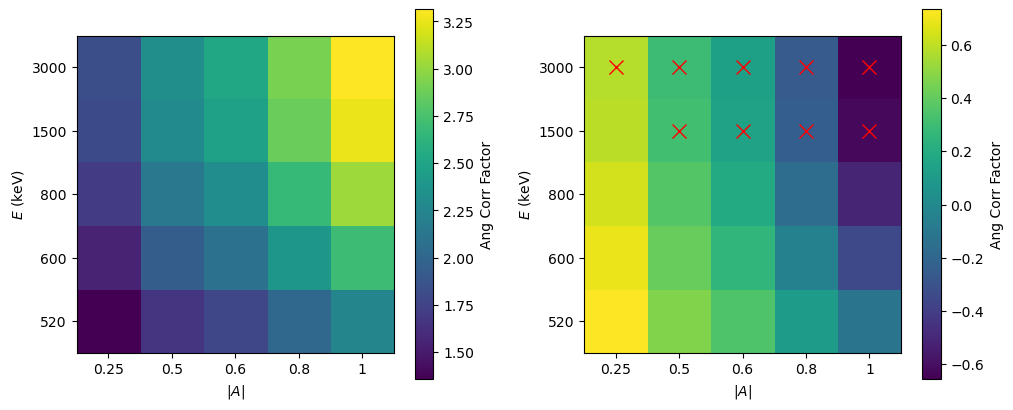

In [4]:
AB_vals = (0.25,0.5,0.6,0.8,1)
E_vals = (520, 600, 800, 1500, 3000)

max_vals_aAB = np.empty((5,5))
min_vals_aAB = np.empty((5,5))

for i, AB in enumerate(AB_vals):
    max_list = []
    min_list = []
    for E in E_vals:
        filename = f"build/AB_{AB}_E_{E}.txt"
        data = np.loadtxt(filename)
        #print(data.shape)

        z_max = int(np.sqrt(data.shape[0]))
        #print(z_max)
        data = np.array(np.split(data,z_max,axis=0))
        x, y, z = np.indices(data.shape)
        x_max = data.shape[0]//2
        y_max = x_max

        z = z/(z.max()+1)*2*np.pi
        x = (x-x_max)/x_max
        y = (y-y_max)/y_max

        max_list.append(data.max())
        min_list.append(data.min())
        print(AB,E)
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(6,6))
        #if "posB" in filename:
        #    ax.set_title(f"Maxima and minima of (a, A) A = {A_vals[i//2]}")
        #else:
        #    ax.set_title(f"Maxima and minima of (a, A) A = {A_vals[i//2]}")
        max_mask = np.where(data==data.max())
        ax.set_xlabel("$\\cos(\\theta_e)$")
        ax.set_ylabel("$\\cos(\\theta_\\nu)$")
        ax.set_zlabel("$\\phi$")
        ax.set_xlim3d([-1,1])
        ax.set_ylim3d([-1,1])
        ax.set_zlim3d([0,2*np.pi])
        ax.view_init(elev=20,azim=120)
        ax.scatter(x[max_mask].flatten(),y[max_mask].flatten(),z[max_mask].flatten(),s=20,c="blue")
        min_mask = np.where(data==data.min())
        ax.scatter(x[min_mask].flatten(),y[min_mask].flatten(),z[min_mask].flatten(),s=20,c="orange")
        ax.plot([x[min_mask][0],x[min_mask][0]],[y[min_mask][0],y[min_mask][0]],[z[min_mask][0],-0.1],color="orange")
        ax.plot([x[min_mask][0],x[min_mask][0]],[y[min_mask][0],-1.0],[z[min_mask][0],z[min_mask][0]],color="orange")
        fig.savefig(f"plots/{filename[6:-4]}_max_min.png")
        plt.show()
        
    max_vals_aAB[:,i] = max_list
    min_vals_aAB[:,i] = min_list 
    

fig, axs = plt.subplots(1,2,figsize = (6*2,6))
for ax in axs:
    ax.xaxis.set_label_text("$|A|$")
    ax.yaxis.set_label_text("$E$ (keV)")
    ax.xaxis.set_ticks(np.arange(5))
    ax.yaxis.set_ticks(np.arange(5))
    ax.xaxis.set_ticklabels(AB_vals)
    ax.yaxis.set_ticklabels(E_vals)
im2d_max = axs[0].imshow(max_vals_aAB,origin="lower")
im2d_min = axs[1].imshow(min_vals_aAB,origin="lower")
fig.colorbar(im2d_max,label="Ang Corr Factor",shrink=0.8,fraction=0.2)
fig.colorbar(im2d_min,label="Ang Corr Factor",shrink=0.8,fraction=0.2)
axs[1].plot(np.where(min_vals_aAB < 0)[0],np.where(min_vals_aAB < 0)[1], "rx", markersize = 10)
fig.savefig("plots/aAB_gt_current_physics.png")
